# **Task#2: MOVIE RATING PREDICTION WITH PYTHON**

**Step 1: Import Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


**Step 2: Load and Explore the Dataset**

In [7]:
# Load the dataset
data = pd.read_csv("IMDbMoviesIndia.csv", encoding='latin-1')

In [8]:
# Explore the dataset
print(data.head())
print(data.info())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

**Step:3 Data Preprocessing**

In [18]:
# Convert categorical features to numerical using Label Encoding

# Convert 'Year' column in string format
data['Year'] = data['Year'].astype(str)

# Preprocess the 'Year' column to extract only numerical values
data['Year'] = data['Year'].str.extract('(\d+)').astype(int)

# Similarly, preprocess the 'Duration' column
data['Duration'] = data['Duration'].astype(str)
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(int)

# Remove commas from the 'Votes' column and convert it to integer
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

label_encoders = {}
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Handle missing values if any
data = data.dropna()

# Define features and target variable
features = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Build and Train the Model**

In [19]:
# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

**Step 5: Make Predictions and Evaluate the Model**

In [20]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.7525223472907805


# **Data visualization**

<ipython-input-23-72fa42a7aa53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)


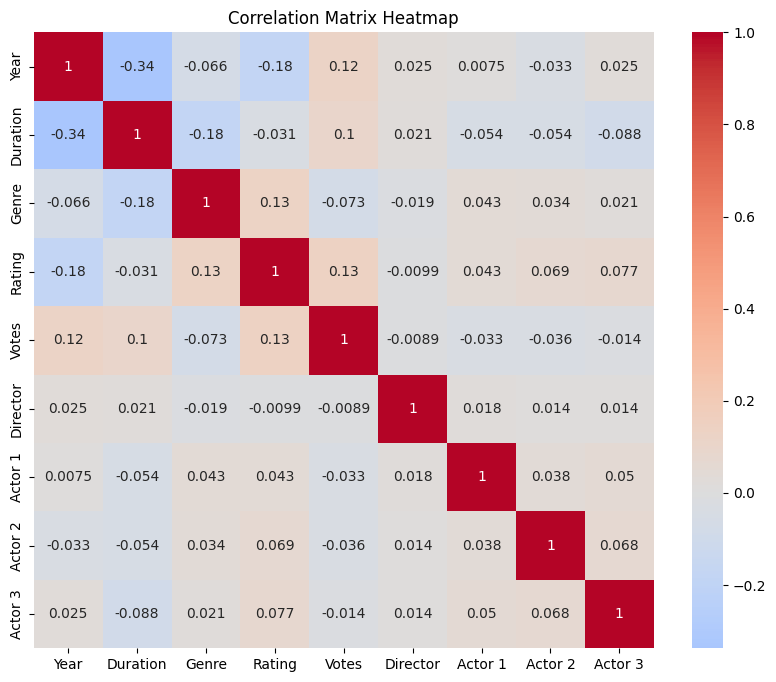

In [23]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


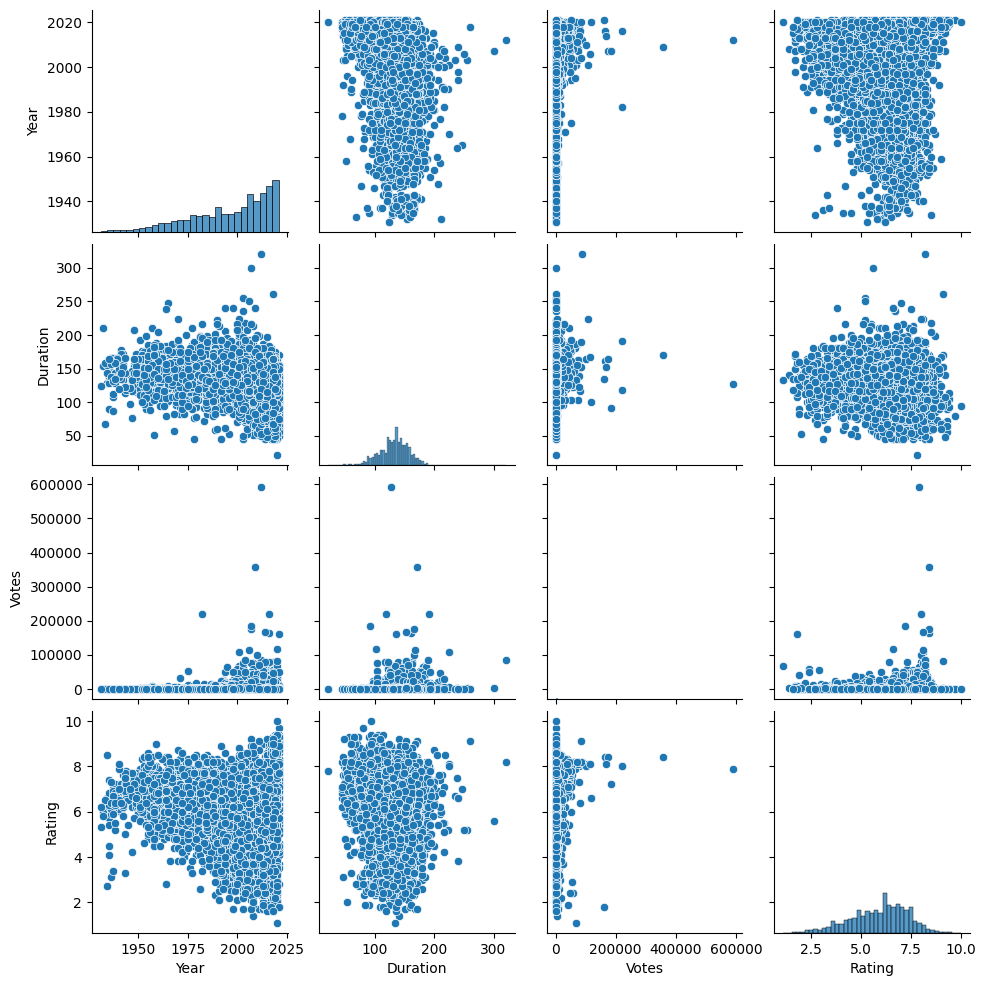

In [24]:
#pairplot
# Visualize pair plot for selected features
sns.pairplot(data[['Year', 'Duration', 'Votes', 'Rating']])
plt.show()


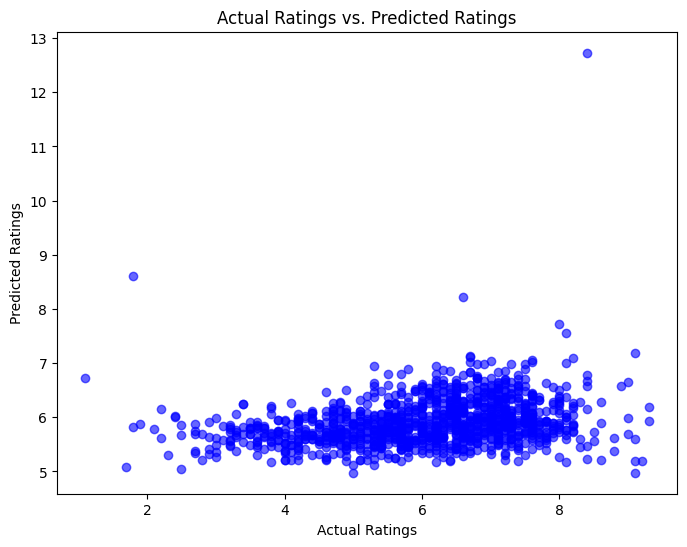

In [25]:
# Visualize actual vs. predicted ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual Ratings vs. Predicted Ratings')
plt.show()


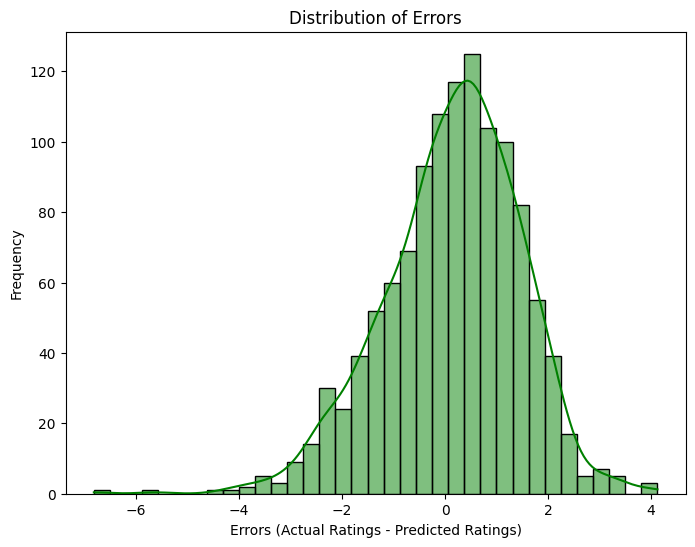

In [26]:
# Calculate and visualize the distribution of errors
errors = y_test - predictions
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='green')
plt.xlabel('Errors (Actual Ratings - Predicted Ratings)')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()
